In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import cross_val_score,  StratifiedKFold
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer

In [2]:
train_df=pd.read_csv("D:/STUDIA/ROK_II/Magisterka/Modele/Dane pierwotne/Dane_do_uczenia_M.csv", encoding="utf-8")
del train_df['Unnamed: 0']

In [3]:
train_df

,ENSG00000212232.1,ENSG00000238741.1,ENSG00000252481.1,ENSG00000239002.3,ENSG00000212443.1,ENSG00000274012.1,ENSG00000252010.1,ENSG00000202198.1,ENSG00000251791.1,ENSG00000202058.1,...,ENSG00000241475.1,ENSG00000274618.1,ENSG00000227293.1,ENSG00000253526.1,ENSG00000270654.1,ENSG00000271394.1,ENSG00000265423.1,ENSG00000253165.1,ENSG00000201901.1,scale
0,27.356617,31.768974,27.356617,5.294829,8.824715,6.645010e+02,2.647415,4.235863e+02,7.059772,16.766959,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,M0
1,8.695633,1.086954,6.521724,2.173908,0.000000,1.758692e+03,1.086954,5.434770e+01,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,M0
2,20.185177,77.002713,7.475992,4.485595,8.971190,2.775836e+03,2.242797,2.609121e+02,6.728392,10.466388,...,0.000000,0.747599,0.0,0.747599,0.0,0.747599,0.000000,0.0,0.000000,M0
3,18.157930,17.431612,6.536855,2.178952,2.905269,2.338741e+02,3.631586,6.827382e+01,1.452634,1.452634,...,0.726317,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,M0
4,29912.168049,21631.677176,9554.333460,20332.131551,5136.495208,1.255850e+06,19221.760289,1.926818e+06,5198.182500,2655.637935,...,0.000000,953.068666,0.0,20.562431,0.0,269.367843,64.771657,0.0,123.374585,M0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,7.748430,3.874215,2.905661,1.937107,0.968554,1.682378e+03,0.000000,6.586165e+01,0.000000,0.968554,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,MX
849,40.077878,17.534072,10.854425,1.669912,12.524337,1.329250e+03,3.339823,9.935974e+01,2.504867,2.504867,...,0.000000,0.000000,0.0,0.834956,0.0,0.000000,0.000000,0.0,0.000000,MX
850,20.868834,16.475395,15.377035,1.098360,8.786877,1.889179e+03,1.098360,7.468846e+01,4.393439,4.393439,...,0.000000,0.000000,0.0,0.000000,0.0,1.098360,0.000000,0.0,0.000000,MX
851,4.708151,12.947416,14.124453,2.354076,9.416302,8.380509e+02,4.708151,2.683646e+02,0.000000,7.062227,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,MX


In [4]:
train_df=train_df.loc[(train_df['scale']!='MX')]

In [5]:
train_df

,ENSG00000212232.1,ENSG00000238741.1,ENSG00000252481.1,ENSG00000239002.3,ENSG00000212443.1,ENSG00000274012.1,ENSG00000252010.1,ENSG00000202198.1,ENSG00000251791.1,ENSG00000202058.1,...,ENSG00000241475.1,ENSG00000274618.1,ENSG00000227293.1,ENSG00000253526.1,ENSG00000270654.1,ENSG00000271394.1,ENSG00000265423.1,ENSG00000253165.1,ENSG00000201901.1,scale
0,27.356617,31.768974,27.356617,5.294829,8.824715,6.645010e+02,2.647415,4.235863e+02,7.059772,16.766959,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,M0
1,8.695633,1.086954,6.521724,2.173908,0.000000,1.758692e+03,1.086954,5.434770e+01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,M0
2,20.185177,77.002713,7.475992,4.485595,8.971190,2.775836e+03,2.242797,2.609121e+02,6.728392,10.466388,...,0.000000,0.747599,0.000000,0.747599,0.000000,0.747599,0.000000,0.0,0.000000,M0
3,18.157930,17.431612,6.536855,2.178952,2.905269,2.338741e+02,3.631586,6.827382e+01,1.452634,1.452634,...,0.726317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,M0
4,29912.168049,21631.677176,9554.333460,20332.131551,5136.495208,1.255850e+06,19221.760289,1.926818e+06,5198.182500,2655.637935,...,0.000000,953.068666,0.000000,20.562431,0.000000,269.367843,64.771657,0.0,123.374585,M0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,10.162692,2.540673,5.081346,2.540673,0.000000,3.506976e+03,10.162692,2.345888e+02,2.540673,1.693782,...,0.000000,1.693782,0.000000,0.000000,0.000000,1.693782,0.846891,0.0,0.000000,M1
706,8.657314,4.328657,7.791583,2.597194,0.000000,1.103808e+03,6.925851,4.068938e+01,9.523046,5.194389,...,0.000000,0.000000,0.865731,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,M1
707,13.471784,17.145907,25.718861,2.449415,3.674123,2.878063e+02,9.797661,9.185307e+01,11.022369,34.291814,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.449415,1.224708,0.0,3.674123,M1
708,12.814782,34.706702,25.629565,2.135797,11.212935,1.056152e+03,4.271594,1.105275e+02,24.561666,17.620326,...,0.000000,0.533949,0.533949,0.000000,0.533949,0.000000,0.533949,0.0,0.533949,M1


In [6]:
y=train_df['scale']
del train_df['scale']

In [7]:
train_df

,ENSG00000212232.1,ENSG00000238741.1,ENSG00000252481.1,ENSG00000239002.3,ENSG00000212443.1,ENSG00000274012.1,ENSG00000252010.1,ENSG00000202198.1,ENSG00000251791.1,ENSG00000202058.1,...,ENSG00000199592.1,ENSG00000241475.1,ENSG00000274618.1,ENSG00000227293.1,ENSG00000253526.1,ENSG00000270654.1,ENSG00000271394.1,ENSG00000265423.1,ENSG00000253165.1,ENSG00000201901.1
0,27.356617,31.768974,27.356617,5.294829,8.824715,6.645010e+02,2.647415,4.235863e+02,7.059772,16.766959,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,8.695633,1.086954,6.521724,2.173908,0.000000,1.758692e+03,1.086954,5.434770e+01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,20.185177,77.002713,7.475992,4.485595,8.971190,2.775836e+03,2.242797,2.609121e+02,6.728392,10.466388,...,0.000000,0.000000,0.747599,0.000000,0.747599,0.000000,0.747599,0.000000,0.0,0.000000
3,18.157930,17.431612,6.536855,2.178952,2.905269,2.338741e+02,3.631586,6.827382e+01,1.452634,1.452634,...,0.000000,0.726317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,29912.168049,21631.677176,9554.333460,20332.131551,5136.495208,1.255850e+06,19221.760289,1.926818e+06,5198.182500,2655.637935,...,31.871768,0.000000,953.068666,0.000000,20.562431,0.000000,269.367843,64.771657,0.0,123.374585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,10.162692,2.540673,5.081346,2.540673,0.000000,3.506976e+03,10.162692,2.345888e+02,2.540673,1.693782,...,0.000000,0.000000,1.693782,0.000000,0.000000,0.000000,1.693782,0.846891,0.0,0.000000
706,8.657314,4.328657,7.791583,2.597194,0.000000,1.103808e+03,6.925851,4.068938e+01,9.523046,5.194389,...,0.000000,0.000000,0.000000,0.865731,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
707,13.471784,17.145907,25.718861,2.449415,3.674123,2.878063e+02,9.797661,9.185307e+01,11.022369,34.291814,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.449415,1.224708,0.0,3.674123
708,12.814782,34.706702,25.629565,2.135797,11.212935,1.056152e+03,4.271594,1.105275e+02,24.561666,17.620326,...,2.135797,0.000000,0.533949,0.533949,0.000000,0.533949,0.000000,0.533949,0.0,0.533949


In [8]:
scaler = StandardScaler()

In [9]:
zestaw_caly = scaler.fit_transform(train_df)
zestaw_caly = np.array(zestaw_caly)
caly_label = np.array(y)


In [10]:
zestaw_caly

array([[-0.2346794 , -0.27644221, -0.27401497, ..., -0.19443738,
        -0.13395776, -0.24327723],
       [-0.23610784, -0.28298729, -0.28281055, ..., -0.19443738,
        -0.13395776, -0.24327723],
       [-0.23522835, -0.26679298, -0.2824077 , ..., -0.19443738,
        -0.13395776, -0.24327723],
       ...,
       [-0.23574224, -0.2795616 , -0.27470636, ..., -0.10068831,
        -0.13395776, -0.1702215 ],
       [-0.23579253, -0.27581554, -0.27474406, ..., -0.15356456,
        -0.13395776, -0.23266026],
       [-0.14972453, -0.24653519, -0.22233403, ..., -0.19443738,
        -0.13395776, -0.24327723]])

In [11]:
caly_label

array(['M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0',
       'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0',
       'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0',
       'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0',
       'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0',
       'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0',
       'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0',
       'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0',
       'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0',
       'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0',
       'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0',
       'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0',
       'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0',
       'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M

## 2. Dobrane parametry

### 2.1 Dobieranie parametrów

In [12]:
ftwo_scorer = make_scorer(fbeta_score,average='binary', beta=1,labels=['M0','M1'],pos_label='M1',greater_is_better=True)

In [13]:
ftwo_scorer

make_scorer(fbeta_score, average=binary, beta=1, labels=['M0', 'M1'], pos_label=M1)

In [14]:
param_grid = {
    'n_neighbors':range(1,110,1),
    'weights': ['uniform'],
    'algorithm': ['auto'],
    'leaf_size': range(1,20,1),
    'p': [1,2]
}


In [15]:
knn_2 = KNeighborsClassifier()
grid_search_2 = GridSearchCV(estimator = knn_2, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

TypeError: __init__() got an unexpected keyword argument 'random_state'

In [24]:
grid_search_2.best_score_

0.23274478330658105

In [25]:
grid_search_2.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [68]:
#grid_search_2.best_score_ 0.22566667636025242

0.22566667636025242

grid_search_2.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

### 3. Z dobranymi parametrami 


In [14]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dane_do_zapisu_2=pd.DataFrame()
licznik=1
wart_2=[]
for train, test in kfold.split(zestaw_caly, caly_label):
    reg = KNeighborsClassifier(leaf_size=1, n_neighbors=1, weights= 'uniform',p=2,algorithm='auto')
    reg.fit(zestaw_caly[train], caly_label[train])
    predykcje=reg.predict(zestaw_caly[test])
    dane_folda_2=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_2=pd.concat([dane_do_zapisu_2,dane_folda_2])
    blad=fbeta_score(caly_label[test], predykcje, average='binary', beta=1,labels=['M0','M1'],pos_label='M1')
    wart_2.append(blad)
    licznik+=1

In [17]:
dane_do_zapisu_2.to_csv('D:\\STUDIA\\ROK_II\\Magisterka\\Modele\\Dane pierwotne\\Dane z cross-walidacji\\Klasa_M_KNN.csv')

In [2]:
dane_do_zapisu_2=pd.read_csv('D:\\STUDIA\\ROK_II\\Magisterka\\Modele\\Dane pierwotne\\Dane z cross-walidacji\\M\\Klasa_M_KNN.csv')

In [15]:
sum(wart_2)/5

0.17735042735042733

In [16]:
wart_2

[0.25,
 0.15384615384615383,
 0.20512820512820512,
 0.09999999999999999,
 0.17777777777777776]

In [3]:
cf_matrix = confusion_matrix(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'])

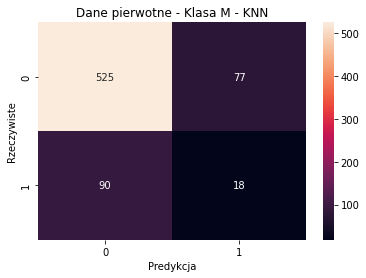

In [4]:

ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, fmt='g')

ax.set_title('Dane pierwotne - Klasa M - KNN')
plt.ylabel('Rzeczywiste')
plt.xlabel('Predykcja')
plt.show()


In [36]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

precision = precision_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=['M0','M1'], average='binary',pos_label='M1')
recall = recall_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=['M0','M1'], average='binary',pos_label='M1')
f1score=fbeta_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=['M0','M1'], average='binary',pos_label='M1', beta=1)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1score: %.3f' % f1score)

Recall: 0.167
Precision: 0.189
F1score: 0.177
